# Test DBScan Implementation

#### Used Libraries Importation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as m

#### Used Dataset Importation

In [2]:
data = pd.read_csv("spreadTest.csv", delimiter = ',', header=0, dtype={'x1':np.float64, 'x2':np.float64})
data.head()

,x1,x2
0,537.288,126.784
1,480.739,177.092
2,484.111,112.014
3,535.600,201.025
4,560.843,200.522


In [3]:
xd = data.values.tolist()

#### Implementation

In [4]:
def getN(xtot, xi, eps):
    Nb = []
    for xj in xtot:
        dist = m.dist(xi,xj)
        if dist <= eps and dist != 0:
            Nb.append(xj)
    return Nb

In [5]:
def DBscan(xdata,e,minp):
    K=0
    cores = []
    label = []
    for i in range(len(xdata)):
        label.append('Noise')

    for i in range (len(xdata)):
        Nbxi = getN(xdata, xdata[i], e)
        if len(Nbxi) >= (minp-1) :
            cores.append(xdata[i])

    for c in cores:
        i = xdata.index(c)
        if label[i] == 'Noise':
            K+=1
            label[i] = K
            Nbci = getN(xdata, c, e)
            Rs = Nbci
            while Rs:
                r = Rs[-1]
                j=xdata.index(r)
                Rs.pop()
                if label[j] == 'Noise':
                    label[j] = K
                    if r in cores:
                        Nr = getN(xdata,r,e)
                        Rs += Nr
    return label

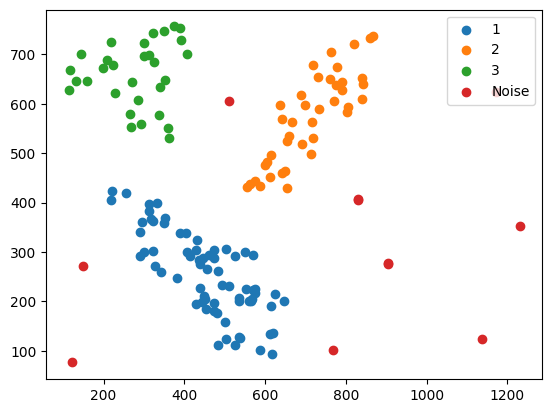

In [14]:
epsilon = 100
MinPoint = 3

label = DBscan(xd,epsilon,MinPoint)

scatterpt = np.asarray(xd)
group = np.asarray(label)
fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatterpt[:,0][ix], scatterpt[:,1][ix], label=g)
ax.legend()
plt.show()